<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/Tracer_une_ellipse_de_confiance_d'un_ensemble_de_donn%C3%A9es_bidimensionnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tracer une ellipse de confiance d'un ensemble de données bidimensionnel

Tracer une ellipse de confiance d'un ensemble de données bidimensionnel ¶
Cet exemple montre comment tracer une ellipse de confiance d'un ensemble de données bidimensionnel, en utilisant son coefficient de corrélation de Pearson.

L'approche utilisée pour obtenir la géométrie correcte est expliquée et prouvée ici :

https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

La méthode évite l'utilisation d'un algorithme itératif de décomposition propre et exploite le fait qu'une matrice de covariance normalisée (composée de coefficients de corrélation de Pearson et de uns) est particulièrement facile à manipuler.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
La fonction de traçage elle-même 
Cette fonction trace l'ellipse de confiance de la covariance des variables de type tableau données x et y. L'ellipse est tracée dans l'axe axes-objet donné.

Les rayons de l'ellipse peuvent être contrôlés par n_std qui est le nombre d'écarts types. La valeur par défaut est 3, ce qui fait que l'ellipse englobe 98,9 % des points si les données sont normalement distribuées comme dans ces exemples (3 écarts-types en 1-D contiennent 99,7 % des données, soit 98,9 % des données en 2- RÉ).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

La fonction de traçage elle-même 
Cette fonction trace l'ellipse de confiance de la covariance des variables de type tableau données x et y. L'ellipse est tracée dans l'axe axes-objet donné.

Les rayons de l'ellipse peuvent être contrôlés par n_std qui est le nombre d'écarts types. La valeur par défaut est 3, ce qui fait que l'ellipse englobe 98,9 % des points si les données sont normalement distribuées comme dans ces exemples (3 écarts-types en 1-D contiennent 99,7 % des données, soit 98,9 % des données en 2- RÉ).

In [5]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Une fonction d'assistance pour créer un jeu de données corrélé 
Crée un jeu de données bidimensionnel aléatoire avec la moyenne bidimensionnelle (mu) et les dimensions (échelle) spécifiées. La corrélation peut être contrôlée par le paramètre 'dépendance', une matrice 2x2.

In [6]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

Corrélation positive, négative et faible ¶
Notez que la forme de la corrélation faible (à droite) est une ellipse et non un cercle car x et y sont mis à l'échelle différemment. Cependant, le fait que x et y ne sont pas corrélés est indiqué par les axes de l'ellipse alignés avec les axes x et y du système de coordonnées.

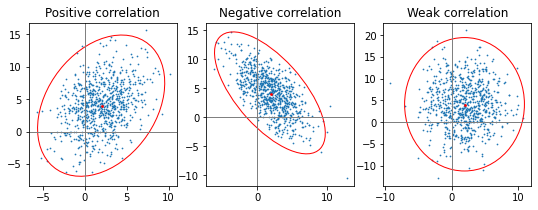

In [7]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

Nombre différent d'écarts types ¶
Un tracé avec n_std = 3 (bleu), 2 (violet) et 1 (rouge)

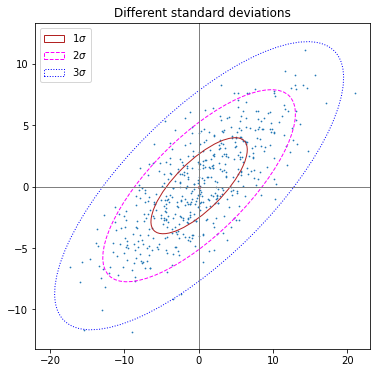

In [8]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

Utilisation des arguments de mot-clé ¶
Utilisez les arguments de mot-clé spécifiés pour matplotlib.patches.Patchafin d'avoir l'ellipse rendue de différentes manières.

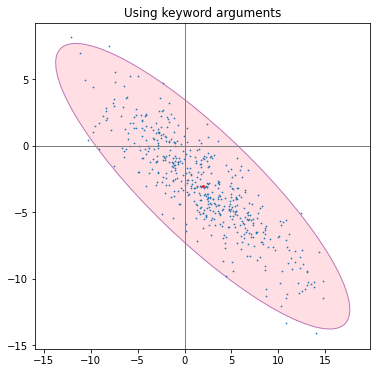

In [9]:
fig, ax_kwargs = plt.subplots(figsize=(6, 6))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title('Using keyword arguments')

fig.subplots_adjust(hspace=0.25)
plt.show()